170498071/170498071 [==============================] - 11s 0us/step


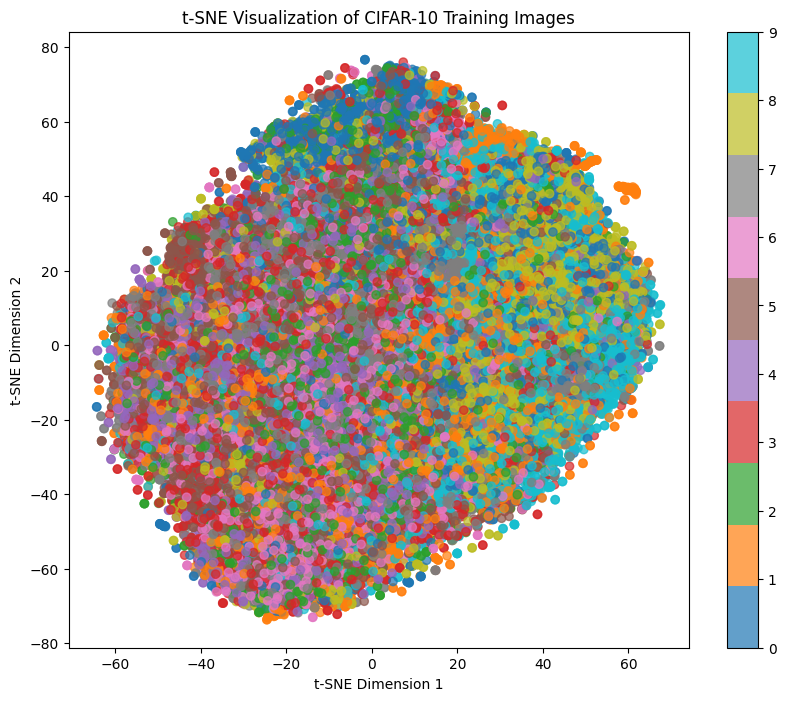

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load CIFAR-10 dataset
from keras.datasets import cifar10
(x_train, y_train), (_, _) = cifar10.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], -1)  # Flatten the images
x_train = StandardScaler().fit_transform(x_train)  # Standardize the features

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_train)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train.flatten(), cmap='tab10', alpha=0.7)
plt.colorbar()
plt.title('t-SNE Visualization of CIFAR-10 Training Images')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [3]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier

def classify_rf(train_data, test_data):
    # 100-50
    for n_estimators in [100]: # 20, 50, 100(50)
        for max_depth in [50, 100, 200]:

            clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0, verbose=1)
            clf.fit(train_data['features'], train_data['labels'])
            test_acc = clf.score(test_data['features'], test_data['labels'])
            print(f'random forrest {n_estimators}-{max_depth} acc: ', test_acc)

def classify_svc(train_data, test_data):
    clf = SVC(verbose=True, max_iter=100)
    clf.fit(train_data['features'], train_data['labels'])
    test_acc = clf.score(test_data['features'], test_data['labels'])
    print('SVC acc: ', test_acc)

def classify_dummy(train_data, test_data):
    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(train_data['features'], train_data['labels'])
    dummy_acc = dummy_clf.score(test_data['features'], test_data['labels'])
    print('Dummy CLF acc: ', dummy_acc)

def classify_mlp(train_data, test_data):
    clf = MLPClassifier(hidden_layer_sizes=(256, 128),
                        learning_rate_init=0.01,
                        max_iter=100, verbose=True, random_state=1)
    clf.fit(train_data['features'], train_data['labels'])
    train_acc = clf.score(train_data['features'], train_data['labels'])
    test_acc = clf.score(test_data['features'], test_data['labels'])

    print(f'mlp train acc {train_acc}, test acc: {test_acc}')

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], -1)  # Flatten the images
norm = StandardScaler()
x_train = norm.fit_transform(x_train)  # Standardize the features

x_test = x_test.reshape(x_test.shape[0], -1)
x_test = norm.transform(x_test)

In [5]:
train_data = {
    'features': x_train,
    'labels': y_train
}

test_data = {
    'features': x_test,
    'labels': y_test
}

In [6]:
classify_mlp(train_data, test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 2.60222571
Iteration 2, loss = 2.02324373
Iteration 3, loss = 1.89838660
Iteration 4, loss = 1.83671473
Iteration 5, loss = 1.81003818
Iteration 6, loss = 1.79633633
Iteration 7, loss = 1.78282872
Iteration 8, loss = 1.77851067
Iteration 9, loss = 1.75815412
Iteration 10, loss = 1.74741967
Iteration 11, loss = 1.74960503
Iteration 12, loss = 1.75677799
Iteration 13, loss = 1.73790558
Iteration 14, loss = 1.72425551
Iteration 15, loss = 1.74310044
Iteration 16, loss = 1.72469357
Iteration 17, loss = 1.71628162
Iteration 18, loss = 1.70008817
Iteration 19, loss = 1.72881219
Iteration 20, loss = 1.70490228
Iteration 21, loss = 1.69262319
Iteration 22, loss = 1.69804617
Iteration 23, loss = 1.70102476
Iteration 24, loss = 1.68652276
Iteration 25, loss = 1.68997182
Iteration 26, loss = 1.67260656
Iteration 27, loss = 1.66940820
Iteration 28, loss = 1.66733081
Iteration 29, loss = 1.69098103
Iteration 30, loss = 1.67438556
Iteration 31, loss = 1.74617115
Iteration 32, los

In [7]:
classify_rf(train_data, test_data)

<ipython-input-3-0187bbe73cbd>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_data['features'], train_data['labels'])
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  9.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.7s finished


random forrest 200-50 acc:  0.4812


<ipython-input-3-0187bbe73cbd>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_data['features'], train_data['labels'])
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  9.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.7s finished


random forrest 200-100 acc:  0.4815


<ipython-input-3-0187bbe73cbd>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_data['features'], train_data['labels'])
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  9.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


random forrest 200-200 acc:  0.4815


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.7s finished


In [8]:
classify_svc(train_data, test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC acc:  0.2474
